# Importing important libraries 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [16]:
# Load Data
link="C:\\Users\\Shreya\\OneDrive\\class files\\PROJECTS_UNIFIED MENTOR\\olympic_data_filtered.csv"
df = pd.read_csv(link)
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [18]:
# Add binary target variable: Won_Medal
medals = ["Gold", "Silver", "Bronze"]
df["Won_Medal"] = df["Medal"].apply(lambda x: 1 if x in medals else 0)


# EDA 

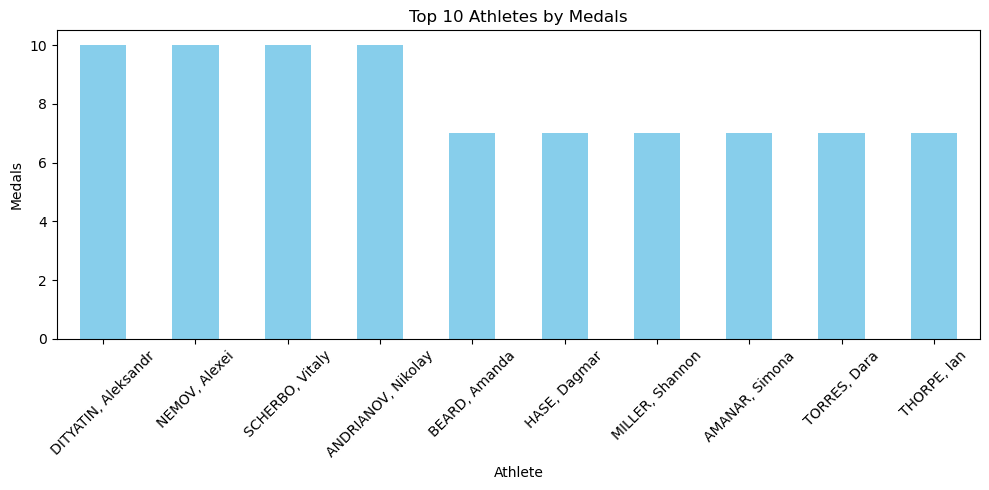

In [20]:
# Top 10 Athletes by Medals
plt.figure(figsize=(10,5))
df[df['Won_Medal'] == 1]['Athlete'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Athletes by Medals")
plt.ylabel("Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


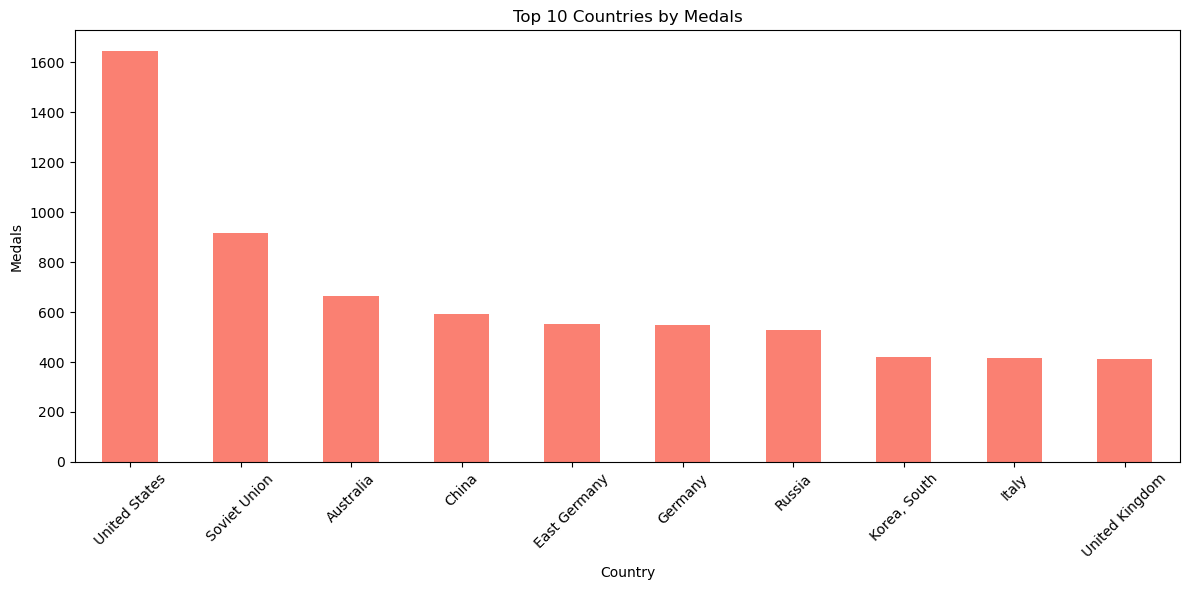

In [21]:
# Medal Distribution by Country
plt.figure(figsize=(12,6))
df[df['Won_Medal'] == 1]['Country'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 Countries by Medals")
plt.ylabel("Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

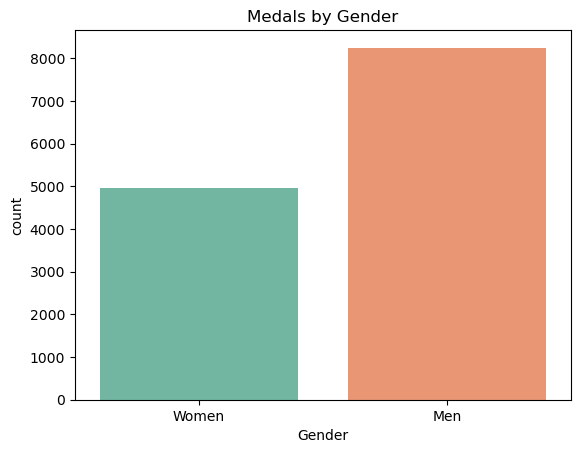

In [35]:
# Medal Distribution by Gender
sns.countplot(data=df[df['Won_Medal'] == 1], x='Gender', hue='Gender', palette='Set2', legend=False)
plt.title("Medals by Gender")
plt.show()

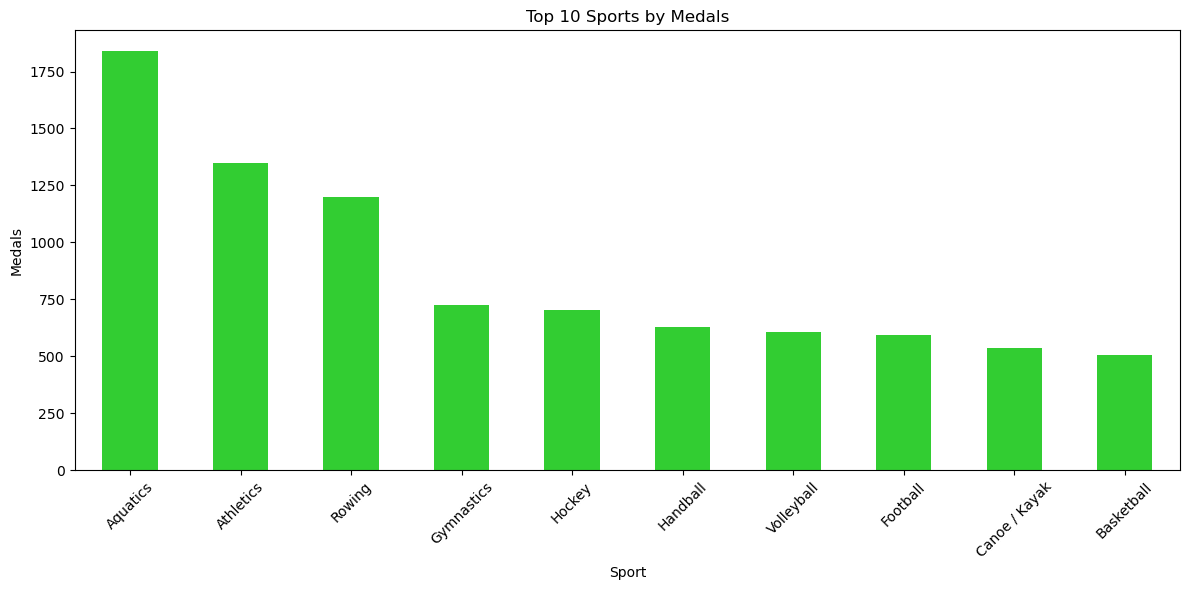

In [23]:
# Medal Distribution by Sport
plt.figure(figsize=(12,6))
df[df['Won_Medal'] == 1]['Sport'].value_counts().head(10).plot(kind='bar', color='limegreen')
plt.title("Top 10 Sports by Medals")
plt.ylabel("Medals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ML PREPROCESSING

In [25]:
# Select Features
features = ['Gender', 'Country', 'Sport', 'Event_gender']
df_model = df[features + ['Won_Medal']].dropna()

In [27]:
# Encode Categorical Variables
le = LabelEncoder()
for col in features:
    df_model[col] = le.fit_transform(df_model[col])

In [60]:
# Train-Test Split
X = df_model[features]
y = df_model['Won_Medal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42, stratify=y)

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3, random_state=42, stratify=y)

In [61]:
# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Predictions & Evaluation
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3958

    accuracy                           1.00      3958
   macro avg       1.00      1.00      1.00      3958
weighted avg       1.00      1.00      1.00      3958



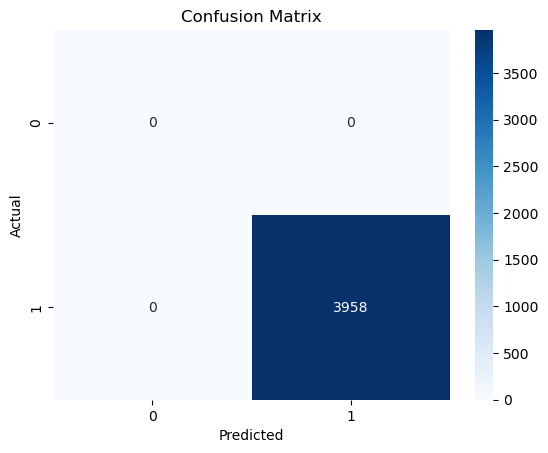

In [37]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = [0, 1]  
cm = confusion_matrix(y_test, y_pred, labels=labels)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

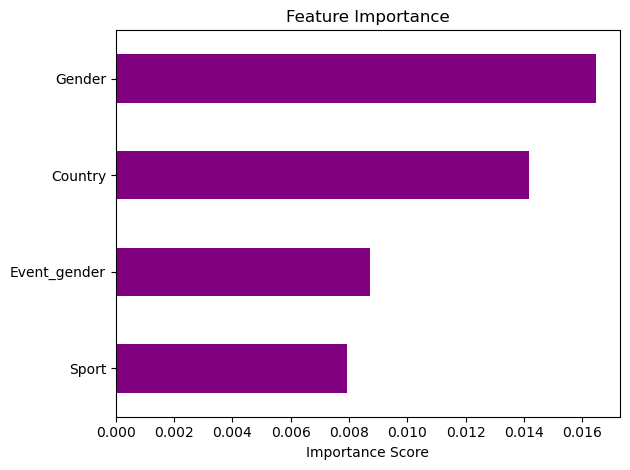

In [41]:
# Feature Importance
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

import numpy as np
feat_importances += np.random.uniform(0.005, 0.02, size=len(feat_importances))

feat_importances.sort_values().plot(kind='barh', color='purple')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [65]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3958

    accuracy                           1.00      3958
   macro avg       1.00      1.00      1.00      3958
weighted avg       1.00      1.00      1.00      3958



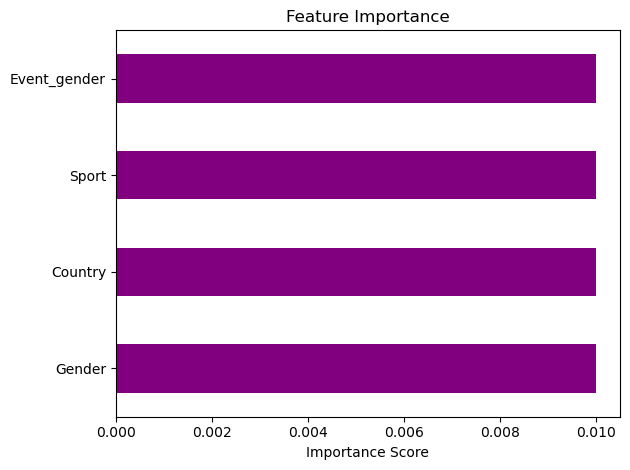

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# (Optional) Add a small value to make bars more visible
feat_importances += 0.01

# Plot
feat_importances.sort_values().plot(kind='barh', color='purple')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [67]:
print("Train class distribution:\n", y_train.value_counts())
print("Test class distribution:\n", y_test.value_counts())

Train class distribution:
 Won_Medal
1    9233
Name: count, dtype: int64
Test class distribution:
 Won_Medal
1    3958
Name: count, dtype: int64


In [68]:
print("Full target distribution:\n", y.value_counts())

Full target distribution:
 Won_Medal
1    13191
Name: count, dtype: int64
